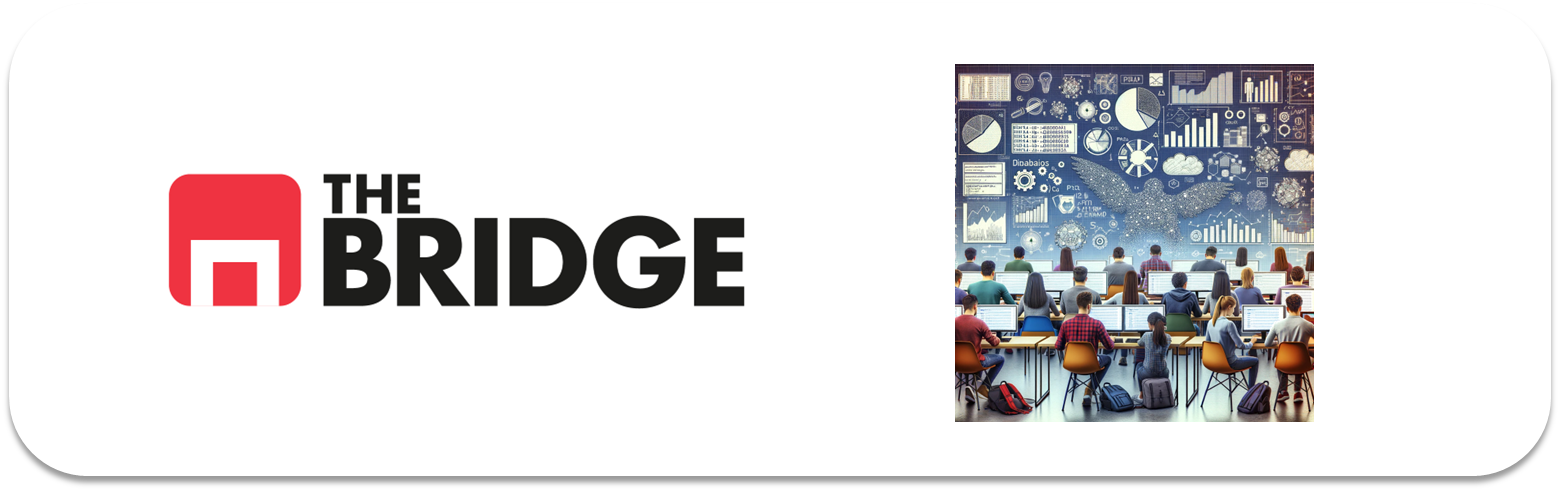

# PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

## Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



### Importación librerías y carga del dataset

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from EDA_function_tools import *

In [4]:
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep="|")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Análisis del dataset

In [5]:
df.shape

(506, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


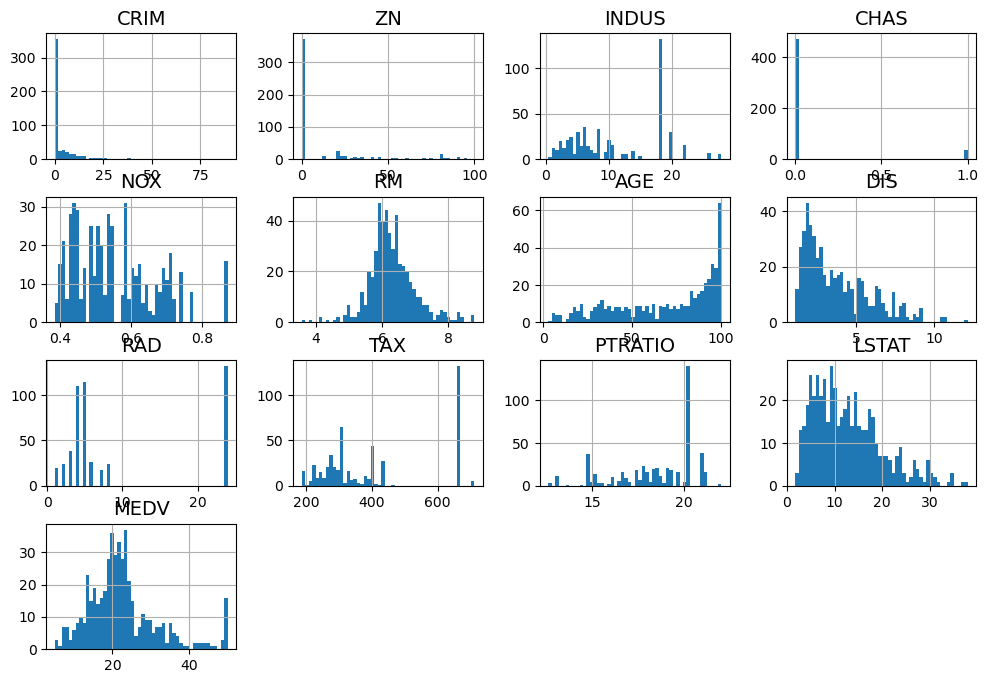

In [7]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset

plt.show()

### Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión

La variable target será 'MEDV' que es la media del precio de las viviendas.

c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


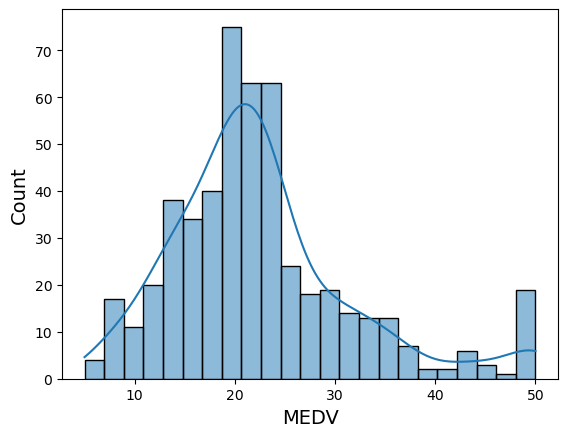

In [22]:
sns.histplot(df["MEDV"], kde= True)
xlabel='variable'
ylabel='Count'

Tiene una distribución muy parecida a una campana de Gauss

### Haz el split en train y test que creas conveniente y de la forma que creas conveniente

In [8]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print('train_set:', len(train_set))
print('test_set:', len(test_set))

train_set: 404
test_set: 102


### Construye las parejas X,y de train y test

In [10]:
features_num = df.select_dtypes(include=['int', 'float']).columns.tolist()
features_num.pop()
features_num

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

In [13]:
# Separación x e y
X_train = train_set.drop(columns= ['MEDV'])
y_train = train_set['MEDV']

X_test = test_set.drop(columns=['MEDV'])
y_test = test_set['MEDV'] 


### Haz un mini-EDA

Son todas variables numéricas

#### Análisis univariable

In [31]:
train_set.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,3.61,11.57,10.99,0.07,0.56,6.32,68.56,3.81,9.36,404.03,18.32,12.46,22.80
std,8.88,23.15,6.89,0.26,0.12,0.71,27.99,2.13,8.59,166.17,2.23,7.11,9.33
min,0.01,0.00,0.74,0.00,0.38,3.86,2.90,1.13,1.00,187.00,12.60,1.73,5.00
25%,0.08,0.00,5.13,0.00,0.45,5.89,45.55,2.09,4.00,279.00,16.80,6.77,16.95
50%,0.26,0.00,8.56,0.00,0.54,6.21,77.70,3.18,5.00,330.00,18.70,10.92,21.60
75%,3.20,20.00,18.10,0.00,0.63,6.64,93.65,5.40,12.00,666.00,20.20,16.37,26.40
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,37.97,50.00


Habrá que intervenir para homogeneizar las variables

c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

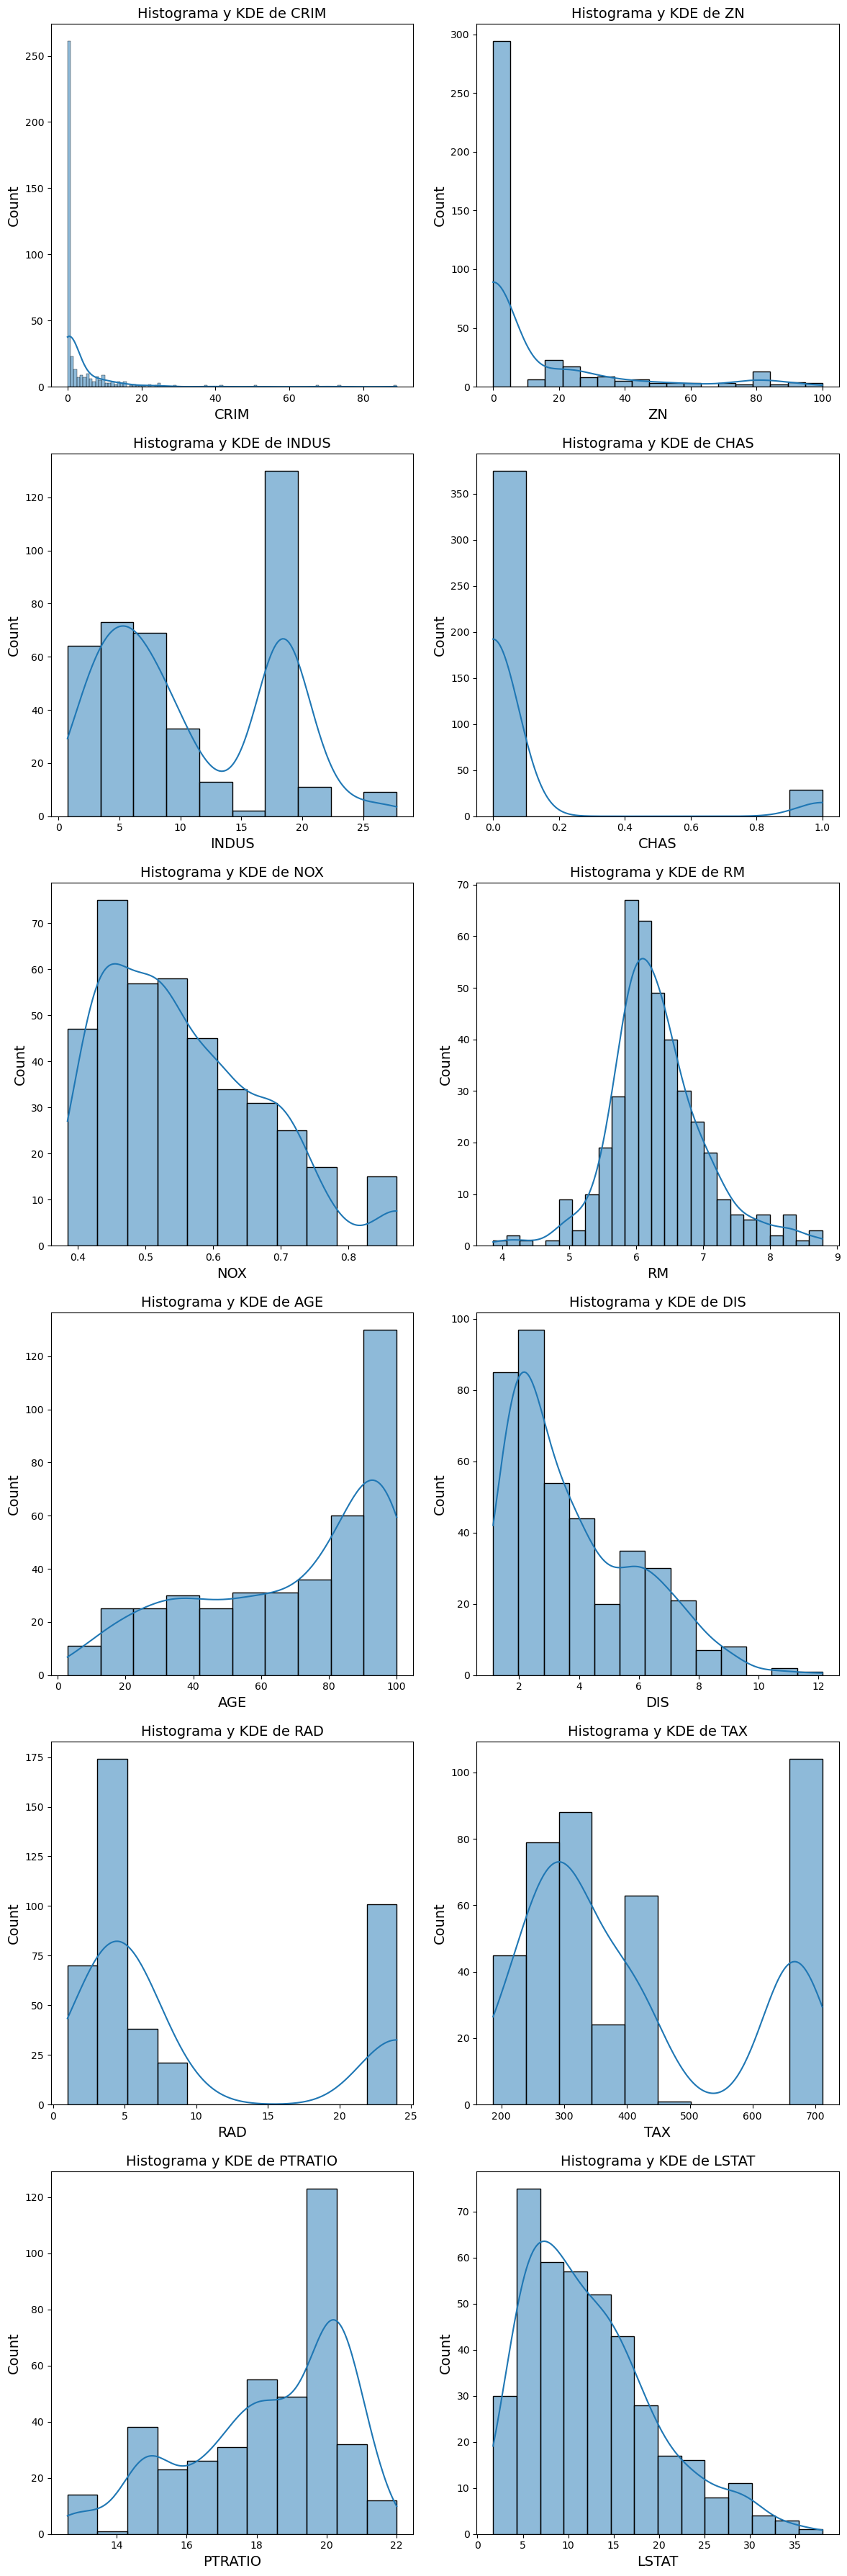

In [37]:
plot_histo_den(train_set,features_num)

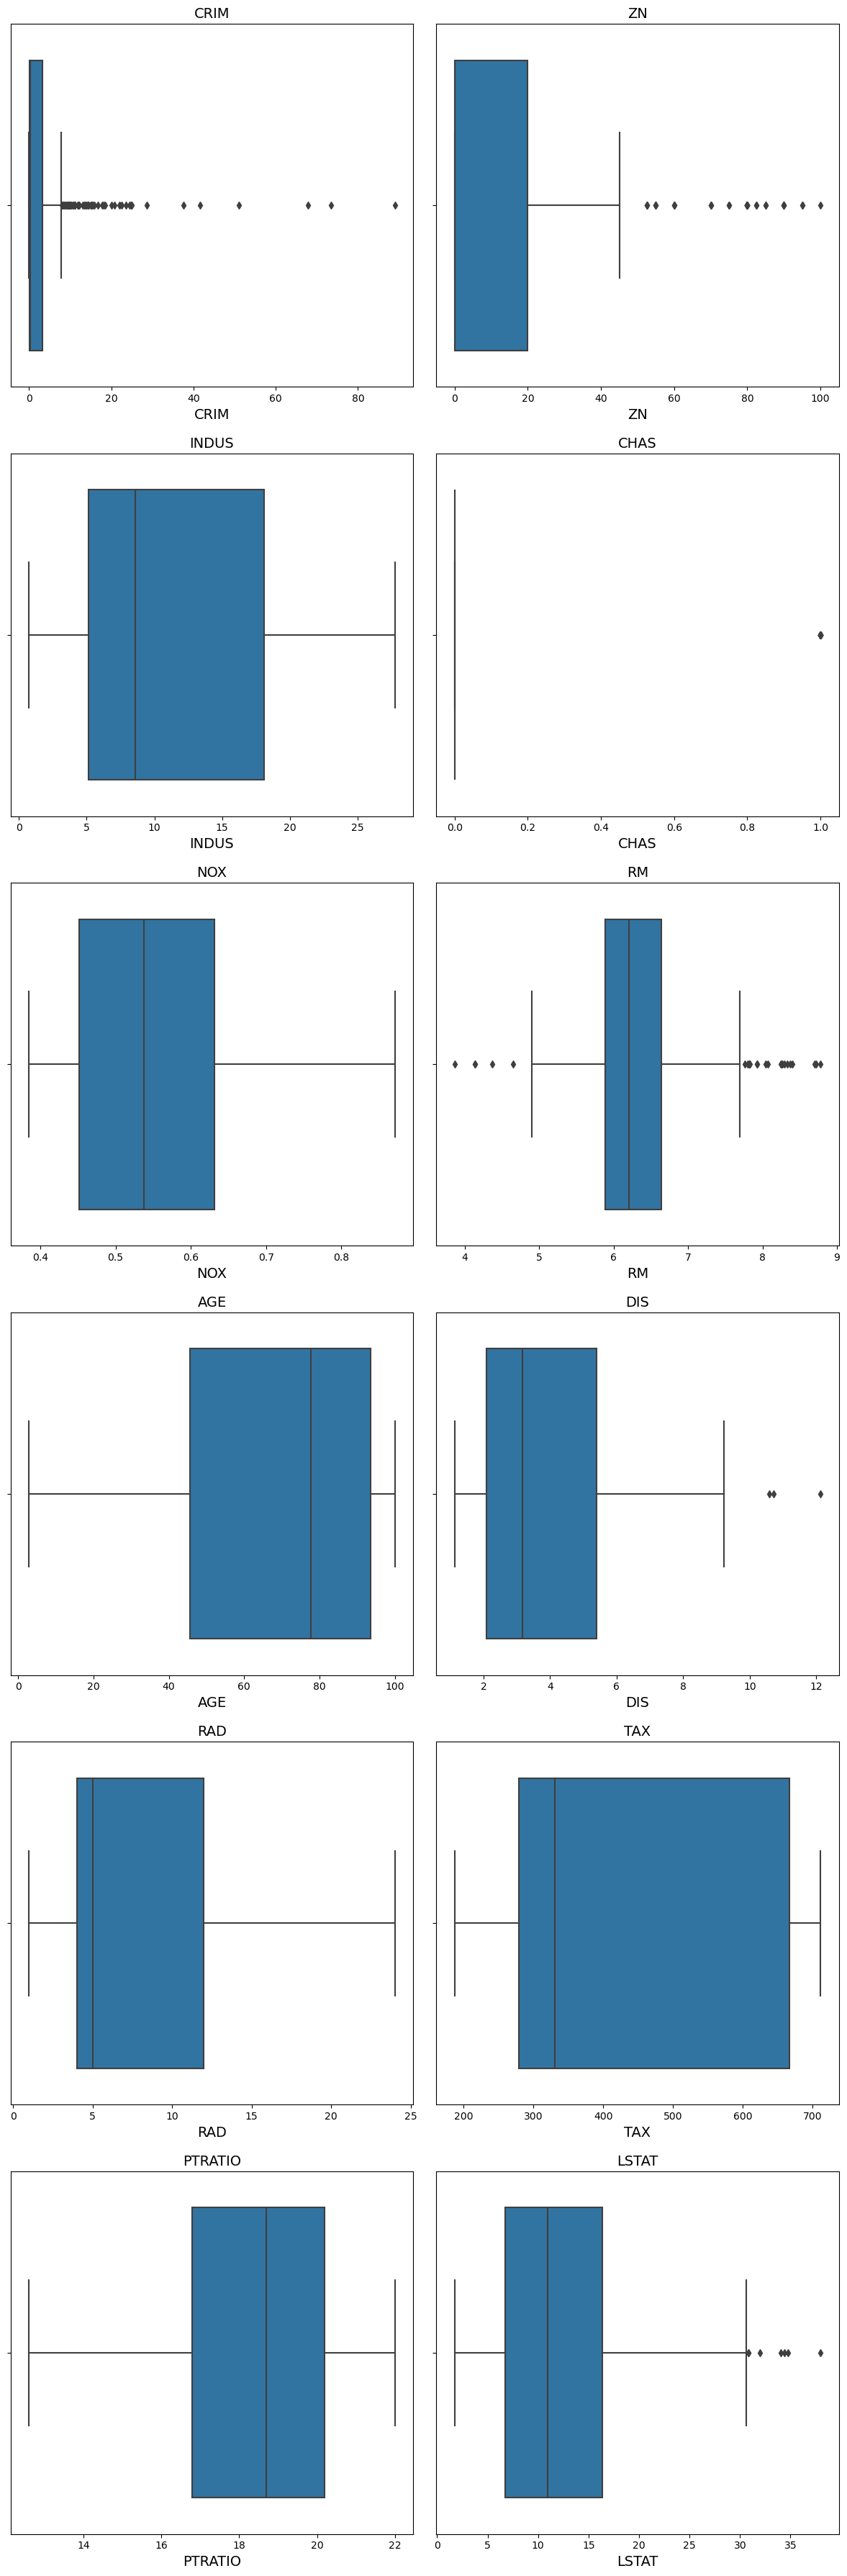

In [33]:
plot_multiple_boxplots(train_set,features_num,)

#### Análisis bivariable

In [34]:
corr_matrix = train_set.corr(numeric_only= True)

corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

In [47]:
corr_matrix[(corr_matrix < -0.30) | (corr_matrix > 0.29)].round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.00,NaN,0.40,NaN,0.40,NaN,0.33,-0.37,0.62,0.58,NaN,0.41,-0.38
ZN,NaN,1.00,-0.53,NaN,-0.53,NaN,-0.58,0.68,-0.31,NaN,-0.39,-0.40,0.31
INDUS,0.40,-0.53,1.00,NaN,0.77,-0.40,0.64,-0.71,0.59,0.70,0.35,0.60,-0.47
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,0.40,-0.53,0.77,NaN,1.00,NaN,0.72,-0.77,0.59,0.65,NaN,0.59,-0.42
RM,NaN,NaN,-0.40,NaN,NaN,1.00,NaN,NaN,NaN,NaN,-0.34,-0.61,0.71
AGE,0.33,-0.58,0.64,NaN,0.72,NaN,1.00,-0.76,0.43,0.47,NaN,0.57,-0.34
DIS,-0.37,0.68,-0.71,NaN,-0.77,NaN,-0.76,1.00,-0.48,-0.52,NaN,-0.49,NaN
RAD,0.62,-0.31,0.59,NaN,0.59,NaN,0.43,-0.48,1.00,0.91,0.47,0.48,-0.39
TAX,0.58,NaN,0.70,NaN,0.65,NaN,0.47,-0.52,0.91,1.00,0.44,0.53,-0.46


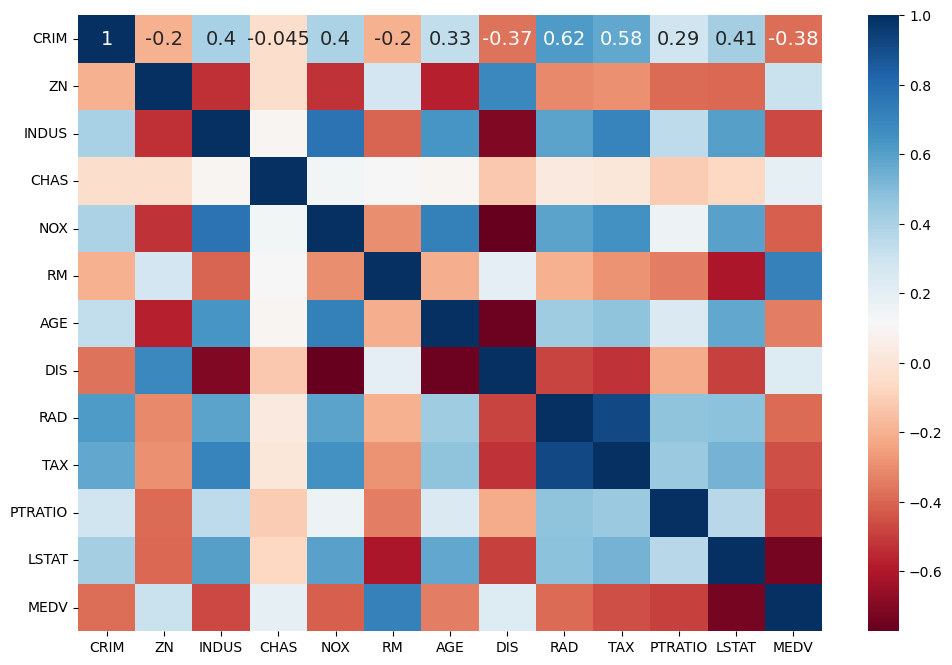

In [56]:
plt.figure(figsize=(12,8))
sns.heatmap(train_set.corr(numeric_only = True),annot=True,cmap='RdBu');
plt.show();

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Trata las variables para que funcionen lo mejor posible en el modelo

In [38]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train[features_num]), columns= features_num)
X_test = pd.DataFrame(scaler.transform(X_test[features_num]), columns= features_num)

### Construye un modelo de regresión lineal.

In [57]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

### Analiza si lo crees conveniente los pesos y la importancia de las features

In [59]:
lin_reg.intercept_

22.796534653465343

In [60]:
lin_reg.coef_

array([-1.12747328,  0.712109  ,  0.17385771,  0.787152  , -2.13759896,
        3.00441958, -0.10050029, -3.11945942,  2.0588977 , -1.87131687,
       -1.9918715 , -3.81901574])

In [62]:
coef_df = pd.DataFrame(lin_reg.coef_, features_num, 
                      columns=['Coefficient'])
coef_df

,Coefficient
CRIM,-1.127473
ZN,0.712109
INDUS,0.173858
CHAS,0.787152
NOX,-2.137599
RM,3.004420
AGE,-0.100500
DIS,-3.119459
RAD,2.058898
TAX,-1.871317


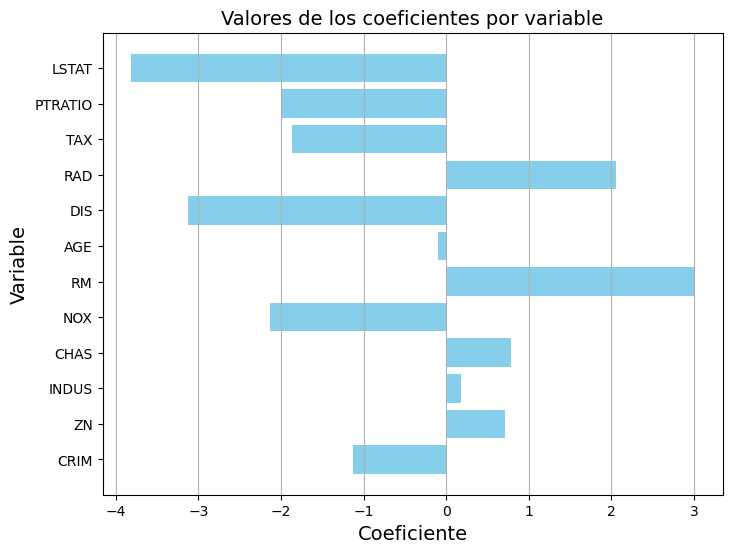

In [76]:
plt.figure(figsize=(8, 6))
plt.barh(coef_df.index, coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.title('Valores de los coeficientes por variable')
plt.grid(axis='x')
plt.show()

### Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales
mostrando MAE,RMSE,MSE y $R2$

In [77]:
# Train
pred_train = lin_reg.predict(X_train)
pred_target = y_train

MAE_train = metrics.mean_absolute_error(pred_target,pred_train)
MSE_train = metrics.mean_squared_error(pred_target,pred_train)
RMSE_train = np.sqrt(metrics.mean_squared_error(pred_target,pred_train))
R2_train = lin_reg.score(X_train,y_train)

print('MAE train %0.3f' % metrics.mean_absolute_error(pred_target,pred_train))
print('MSE train %0.3f' % metrics.mean_squared_error(pred_target,pred_train))
print('RMSE train %0.3f' % np.sqrt(metrics.mean_squared_error(pred_target,pred_train)))
#print('MAPE %0.3f' % metrics.mean_absolute_percentage_error(pred_target,pred_train))
print('R2 train %0.3f' % lin_reg.score(X_train,y_train))

MAE train 3.424
MSE train 22.604
RMSE train 4.754
R2 train 0.740


In [78]:
# Test
pred_train = lin_reg.predict(X_test)
pred_target = y_test

MAE_test = metrics.mean_absolute_error(pred_target,pred_train)
MSE_test = metrics.mean_squared_error(pred_target,pred_train)
RMSE_test = np.sqrt(metrics.mean_squared_error(pred_target,pred_train))
R2_test = lin_reg.score(X_test,y_test)

print('MAE test %0.3f' % metrics.mean_absolute_error(pred_target,pred_train))
print('MSE test %0.3f' % metrics.mean_squared_error(pred_target,pred_train))
print('RMSE test %0.3f' % np.sqrt(metrics.mean_squared_error(pred_target,pred_train)))
#print('MAPE test %0.3f' % metrics.mean_absolute_percentage_error(pred_target,pred_train))
print('R2 test %0.3f' % lin_reg.score(X_test,y_test))

MAE test 3.111
MSE test 22.778
RMSE test 4.773
R2 test 0.689


In [79]:
print(f'La diferencia en el MAE entre test ({MAE_test:.2f}) y train ({MAE_train:.2f}) es: {MAE_test-MAE_train:.2f}')
print(f'La diferencia en el MSE entre test ({MSE_test:.2f}) y train ({MSE_train:.2f}) es: {MSE_test-MSE_train:.2f}')
print(f'La diferencia en el RMSE entre test ({RMSE_test:.2f}) y train ({RMSE_train:.2f}) es: {RMSE_test-RMSE_train:.2f}')
print(f'La diferencia en el R2 entre test ({R2_test:.2f}) y train ({R2_train:.2f}) es: {R2_test-R2_train:.2f}')

La diferencia en el MAE entre test (3.11) y train (3.42) es: -0.31
La diferencia en el MSE entre test (22.78) y train (22.60) es: 0.17
La diferencia en el RMSE entre test (4.77) y train (4.75) es: 0.02
La diferencia en el R2 entre test (0.69) y train (0.74) es: -0.05


In [73]:
predictions = lin_reg.predict(X_test)
predictions

array([28.95821495, 36.28754087, 14.09883571, 25.03314354, 17.60196806,
       23.29436764, 17.41497772, 13.6889158 , 22.03729908, 20.30090287,
       24.79283915, 18.38832326, -4.33294443, 21.56693306, 19.2845309 ,
       25.21698591, 20.49872474,  4.58687634, 40.37044823, 16.25684307,
       27.23092232, 30.00757759, 11.48463522, 24.08876594, 17.58648051,
       15.31043178, 22.59893811, 17.89670956, 22.53685855, 18.88561711,
       22.39289985, 25.12908716, 24.4061559 , 16.95999671, 16.34608298,
       17.83812389, 31.23964364, 20.11355948, 23.97427249, 24.7026198 ,
       13.51365336, 32.23874536, 42.57623121, 17.23647236, 27.36800252,
       15.83869172, 14.36670582, 25.88507693, 19.14362342, 29.98338277,
       21.02214978, 34.30047435, 15.76119774, 26.0702547 , 39.32897786,
       21.57141303, 17.57577742, 32.79951673, 25.03333768, 12.7303957 ,
       22.41675169, 30.40352449, 31.53053337, 17.1501077 , 20.44580503,
       16.7365876 , 19.23921681, 25.97868876, 30.71818893, 15.06

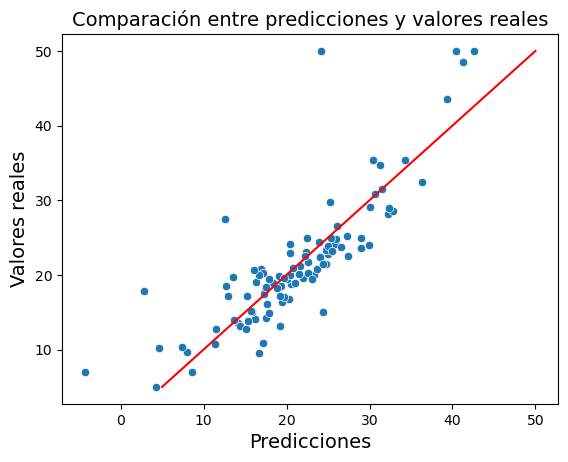

In [75]:
sns.scatterplot(x=predictions,y=y_test);

plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'red')

# Etiquetas y título
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Comparación entre predicciones y valores reales')

# Mostrar el gráfico
plt.show()

### Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización

#### Posibilidad 1

In [80]:
# Train
# Inicializamos el Ridge
ridgeR = Ridge(alpha = 10) 
ridgeR.fit(X_train, y_train)

MAE_train_ridge = metrics.mean_absolute_error(y_train, ridgeR.predict(X_train))
MSE_train_ridge = metrics.mean_squared_error(y_train,ridgeR.predict(X_train))
RMSE_train_ridge = np.sqrt(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)))
R2_train_ridge = ridgeR.score(X_train, y_train)


print("Train MAE: %0.3f" % metrics.mean_absolute_error(y_train, ridgeR.predict(X_train)))
print("Train MSE: %0.3f" % metrics.mean_squared_error(y_train,ridgeR.predict(X_train)))
print("Train RMSE: %0.3f" % np.sqrt(metrics.mean_squared_error(y_train, ridgeR.predict(X_train))))
print("Train R2: %0.3f" % ridgeR.score(X_train, y_train))

Train MAE: 3.400
Train MSE: 22.694
Train RMSE: 4.764
Train R2: 0.739


In [81]:
# Test
ridgeR = Ridge(alpha = 10) 
ridgeR.fit(X_test, y_test)

MAE_test_ridge = metrics.mean_absolute_error(y_test, ridgeR.predict(X_test))
MSE_test_ridge = metrics.mean_squared_error(y_train,ridgeR.predict(X_train))
RMSE_test_ridge = np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)))
R2_test_ridge = ridgeR.score(X_test, y_test)


print("Test MAE: %0.3f" % metrics.mean_absolute_error(y_test, ridgeR.predict(X_test)))
print("Test MSE: %0.3f" % metrics.mean_squared_error(y_train,ridgeR.predict(X_train)))
print("Test RMSE: %0.3f" % np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))
print("Test R2: %0.3f" % ridgeR.score(X_test, y_test))

Test MAE: 2.809
Test MSE: 29.172
Test RMSE: 4.303
Test R2: 0.748


In [82]:
print(f'La diferencia en el MAE entre test_ridge ({MAE_test_ridge:.2f}) y test ({MAE_test:.2f}) es: {MAE_test_ridge-MAE_test:.2f}')
print(f'La diferencia en el MSE entre test_ridge ({MSE_test_ridge:.2f}) y test ({MSE_train:.2f}) es: {MSE_test_ridge-MSE_train:.2f}')
print(f'La diferencia en el RMSE entre test_ridge ({RMSE_test_ridge:.2f}) y test ({RMSE_train:.2f}) es: {RMSE_test_ridge-RMSE_train:.2f}')
print(f'La diferencia en el R2 entre test_ridge ({R2_test_ridge:.2f}) y test ({R2_train:.2f}) es: {R2_test_ridge-R2_train:.2f}')

La diferencia en el MAE entre test_ridge (2.81) y test (3.11) es: -0.30
La diferencia en el MSE entre test_ridge (29.17) y test (22.60) es: 6.57
La diferencia en el RMSE entre test_ridge (4.30) y test (4.75) es: -0.45
La diferencia en el R2 entre test_ridge (0.75) y test (0.74) es: 0.01


#### Posibilidad 2

In [83]:
# Train
# Inicializamos el Ridge
ridgeR = Ridge(alpha = 5) 
ridgeR.fit(X_train, y_train)

MAE_train_ridge = metrics.mean_absolute_error(y_train, ridgeR.predict(X_train))
MSE_train_ridge = metrics.mean_squared_error(y_train,ridgeR.predict(X_train))
RMSE_train_ridge = np.sqrt(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)))
R2_train_ridge = ridgeR.score(X_train, y_train)


print("Train MAE: %0.3f" % metrics.mean_absolute_error(y_train, ridgeR.predict(X_train)))
print("Train MSE: %0.3f" % metrics.mean_squared_error(y_train,ridgeR.predict(X_train)))
print("Train RMSE: %0.3f" % np.sqrt(metrics.mean_squared_error(y_train, ridgeR.predict(X_train))))
print("Train R2: %0.3f" % ridgeR.score(X_train, y_train))

Train MAE: 3.409
Train MSE: 22.632
Train RMSE: 4.757
Train R2: 0.739


In [84]:
# Test
ridgeR = Ridge(alpha = 5) 
ridgeR.fit(X_test, y_test)

MAE_test_ridge = metrics.mean_absolute_error(y_test, ridgeR.predict(X_test))
MSE_test_ridge = metrics.mean_squared_error(y_train,ridgeR.predict(X_train))
RMSE_test_ridge = np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)))
R2_test_ridge = ridgeR.score(X_test, y_test)


print("Test MAE: %0.3f" % metrics.mean_absolute_error(y_test, ridgeR.predict(X_test)))
print("Test MSE: %0.3f" % metrics.mean_squared_error(y_train,ridgeR.predict(X_train)))
print("Test RMSE: %0.3f" % np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))
print("Test R2: %0.3f" % ridgeR.score(X_test, y_test))

Test MAE: 2.817
Test MSE: 28.897
Test RMSE: 4.216
Test R2: 0.758


In [85]:
print(f'La diferencia en el MAE entre test_ridge ({MAE_test_ridge:.2f}) y test ({MAE_test:.2f}) es: {MAE_test_ridge-MAE_test:.2f}')
print(f'La diferencia en el MSE entre test_ridge ({MSE_test_ridge:.2f}) y test ({MSE_train:.2f}) es: {MSE_test_ridge-MSE_train:.2f}')
print(f'La diferencia en el RMSE entre test_ridge ({RMSE_test_ridge:.2f}) y test ({RMSE_train:.2f}) es: {RMSE_test_ridge-RMSE_train:.2f}')
print(f'La diferencia en el R2 entre test_ridge ({R2_test_ridge:.2f}) y test ({R2_train:.2f}) es: {R2_test_ridge-R2_train:.2f}')

La diferencia en el MAE entre test_ridge (2.82) y test (3.11) es: -0.29
La diferencia en el MSE entre test_ridge (28.90) y test (22.60) es: 6.29
La diferencia en el RMSE entre test_ridge (4.22) y test (4.75) es: -0.54
La diferencia en el R2 entre test_ridge (0.76) y test (0.74) es: 0.02


#### Posibilidad 3

In [98]:
# Train
# Inicializamos el Ridge
ridgeR = Ridge(alpha = 15) 
ridgeR.fit(X_train, y_train)

MAE_train_ridge = metrics.mean_absolute_error(y_train, ridgeR.predict(X_train))
MSE_train_ridge = metrics.mean_squared_error(y_train,ridgeR.predict(X_train))
RMSE_train_ridge = np.sqrt(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)))
R2_train_ridge = ridgeR.score(X_train, y_train)


print("Train MAE: %0.3f" % metrics.mean_absolute_error(y_train, ridgeR.predict(X_train)))
print("Train MSE: %0.3f" % metrics.mean_squared_error(y_train,ridgeR.predict(X_train)))
print("Train RMSE: %0.3f" % np.sqrt(metrics.mean_squared_error(y_train, ridgeR.predict(X_train))))
print("Train R2: %0.3f" % ridgeR.score(X_train, y_train))

Train MAE: 3.393
Train MSE: 22.775
Train RMSE: 4.772
Train R2: 0.738


In [99]:
# Test
ridgeR = Ridge(alpha = 15) 
ridgeR.fit(X_test, y_test)

MAE_test_ridge = metrics.mean_absolute_error(y_test, ridgeR.predict(X_test))
MSE_test_ridge = metrics.mean_squared_error(y_train,ridgeR.predict(X_train))
RMSE_test_ridge = np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)))
R2_test_ridge = ridgeR.score(X_test, y_test)


print("Test MAE: %0.3f" % metrics.mean_absolute_error(y_test, ridgeR.predict(X_test)))
print("Test MSE: %0.3f" % metrics.mean_squared_error(y_train,ridgeR.predict(X_train)))
print("Test RMSE: %0.3f" % np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))
print("Test R2: %0.3f" % ridgeR.score(X_test, y_test))

Test MAE: 2.828
Test MSE: 29.652
Test RMSE: 4.384
Test R2: 0.738


In [100]:
print(f'La diferencia en el MAE entre test_ridge ({MAE_test_ridge:.2f}) y test ({MAE_test:.2f}) es: {MAE_test_ridge-MAE_test:.2f}')
print(f'La diferencia en el MSE entre test_ridge ({MSE_test_ridge:.2f}) y test ({MSE_train:.2f}) es: {MSE_test_ridge-MSE_train:.2f}')
print(f'La diferencia en el RMSE entre test_ridge ({RMSE_test_ridge:.2f}) y test ({RMSE_train:.2f}) es: {RMSE_test_ridge-RMSE_train:.2f}')
print(f'La diferencia en el R2 entre test_ridge ({R2_test_ridge:.2f}) y test ({R2_train:.2f}) es: {R2_test_ridge-R2_train:.2f}')

La diferencia en el MAE entre test_ridge (2.83) y test (3.11) es: -0.28
La diferencia en el MSE entre test_ridge (29.65) y test (22.60) es: 7.05
La diferencia en el RMSE entre test_ridge (4.38) y test (4.75) es: -0.37
La diferencia en el R2 entre test_ridge (0.74) y test (0.74) es: -0.00


### Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?

No termino de entenderlo.  
Aparentemente los resultados del entrenamiento del modelo (base-line?), no varían mucho entre el dataset de train y el dataset de test (0.05), si bien, su coeficiente de determinación, es un poco bajo.  
Al aplicar las regularizaciones, parece que el modelo Ridge con un alpha de 15 es el que incrementa el coeficiente de determinación en el dataset de test.